<h1> Supervised Learning: Decision Tree for heart disease dataset using Python </h1>

**Prepared By:**
<br>Suman Biswas
<br>Scientific Officer (Statistics)
<br>Bangladesh Agricultural Research Institute
<br>Gazipur-1701, Bangladesh

**This topic covers**

1. how to load the dataset
2. explanation of the features and target variable
3. how to deal with the missing values
4. how to perform One-hot Encoding
5. how to split the dataset into 80% training and 20% for testing. Add random state and stratification
6. how to perform the training with Decision Tree Classifier
7. how to show a tree diagram of the Decision Tree
8. how to show the Confusion Matrix, Classification report, and ROC-AUC
9. explanation the outcomes (in brief)

#### Importing Required Libraries

In [126]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Loading Dataset

In [127]:
# dataset source: https://archive.ics.uci.edu/ml/datasets/heart+disease
df = pd.read_csv("processed.cleveland.data", header=None)
display(df.head(10))
print(df.shape)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


(303, 14)


##### Rename the columns

In [128]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
              'restecg', 'thalach', 'exang', 'oldpeak', 
              'slope', 'ca', 'thal', 'num']
display(df.head(10))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


#### 2. Explanation of the features and target variable

##### Separating the features and target variable

In [129]:
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']

target = ['num']

**Here,**
<br>**Features**
* age = age in years
* sex = sex (1 = male; 0 = female)
* cp  = chest pain type
        Value 1: typical angina
        Value 2: atypical angina
        Value 3: non-anginal pain
        Value 4: asymptomatic
* trestbps = resting blood pressure (in mm Hg on admission to the hospital) 
* chol = serum cholestoral in mg/dl
* fbs  = fasting blood sugar > 120 mg/dl)(1 = true; 0 = false) 
* restecg = resting electrocardiographic results
        Value 0: normal
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria, 'thalach',
* thalach: maximum heart rate achieved
* exang = exercise induced angina (1 = yes; 0 = no)  
* oldpeak = ST depression induced by exercise relative to rest
* slope = the slope of the peak exercise ST segment
        Value 1: upsloping
        Value 2: flat
        Value 3: downsloping
* ca = number of major vessels (0-3) colored by flourosopy
* thal = 3- normal; 6- fixed defect; 7- reversable defect

<br>**Target variable**
* hd = diagnosis of heart disease (angiographic disease status)
        Value 0: < 50% diameter narrowing
        Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)

#### 3. Deal with the missing values

In [130]:
## Checking data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [131]:
## Checking unique values
print("cp unique value: ", df['cp'].unique())
print("fbs unique value: ", df['fbs'].unique())
print("restecg unique value: ", df['restecg'].unique())
print("exang unique value: ", df['exang'].unique())
print("slope unique value: ", df['slope'].unique())
print("ca unique value: ", df['ca'].unique())
print("thal unique value: ", df['thal'].unique())
print("num: ", df['num'].unique())

cp unique value:  [1. 4. 3. 2.]
fbs unique value:  [1. 0.]
restecg unique value:  [2. 0. 1.]
exang unique value:  [0. 1.]
slope unique value:  [3. 2. 1.]
ca unique value:  ['0.0' '3.0' '2.0' '1.0' '?']
thal unique value:  ['6.0' '3.0' '7.0' '?']
num:  [0 2 1 3 4]


In [132]:
# count the number of missing values for each column
ca_missing = (df['ca'] == "?").sum()
print("ca missing = ", ca_missing)

thal_missing = (df['thal'] == "?").sum()
print("thal missing = ", thal_missing)

ca missing =  4
thal missing =  2


Observation: There are 4 missing values in 'ca' and 2 values in 'thal' feature of the dataset

In [133]:
## Dropping the missing values
df = pd.read_csv("processed.cleveland.data", header=None, na_values="?")
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
              'restecg', 'thalach', 'exang', 'oldpeak', 
              'slope', 'ca', 'thal', 'num']
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


#### Target Variable

In [134]:
## Renaming target variables
df = df.rename(columns={'num': 'hd'})
df['hd'].value_counts()

# Rearrange the category of the target variable
df[df['hd'] > 1] = 1

print(df['hd'].value_counts())

0    160
1    137
Name: hd, dtype: int64


In [135]:
## Create feature and target variables
X = df.drop('hd', axis=1)
y = df[['hd']]

print(X.shape, y.shape)

(297, 13) (297, 1)


#### 4. One-hot Encoding

In [136]:
X = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

display(X.head())
print(X.shape)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,0,0,0,1,0,1,0,1,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,1,0,0,0,0,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,0,1,0,1,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,1,0,0,0,1,0,0,1,0,0


(297, 19)


#### 5. Split the dataset into 80% training and 20% for testing by adding random state and stratification

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(237, 19) (60, 19) (237, 1) (60, 1)


#### 6. Decision Tree classifier

In [138]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT = model_DT.fit(X_train, y_train)

## Prediction
y_pred_DT = model_DT.predict(X_test)

#### 7. Tree diagram of the Decision Tree

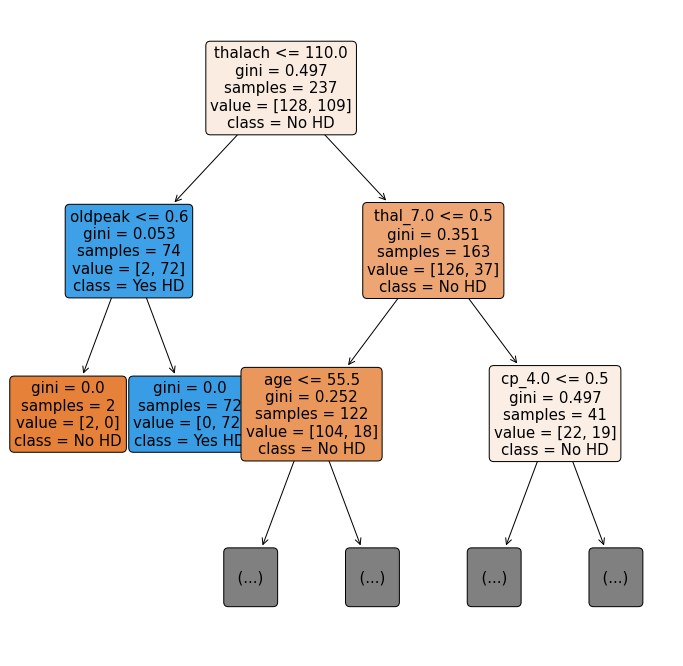

In [139]:
plt.figure(figsize = (12, 12))
plot_tree(model_DT, filled=True, rounded=True, class_names = ["No HD", "Yes HD"], feature_names = X.columns, max_depth=2, fontsize=15)

plt.show()

#### 8. Confusion Matrix, Classification report, and ROC-AUC

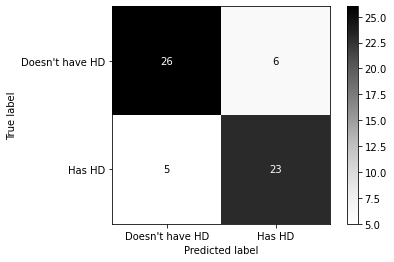

In [140]:
plot_confusion_matrix(model_DT, X_test, y_test, display_labels=["Doesn't have HD", "Has HD"],cmap='Greys')
plt.show()

Accuracy:  0.82
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        32
           1       0.79      0.82      0.81        28

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



'roc_data'

,threshold,FPR,TPR
0,2.0,0.0000,0.000000
1,1.0,0.1875,0.821429
2,0.0,1.0000,1.000000


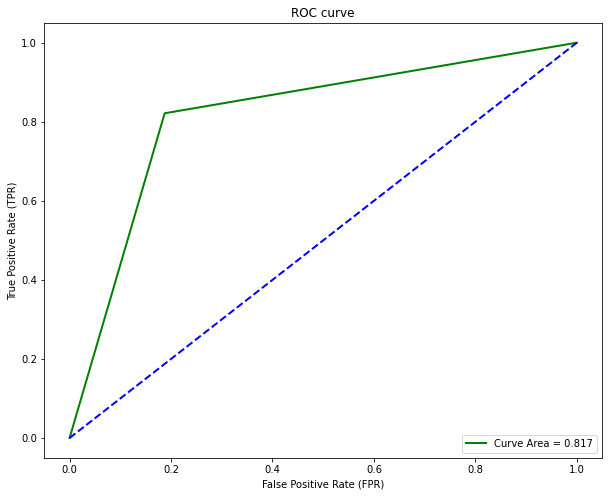

In [141]:
## Accuracy
print('Accuracy: ', round(accuracy_score(y_test, y_pred_DT),2))

## Classification report
print(classification_report(y_test, y_pred_DT))

## roc-auc curve
fpr, tpr, thr = roc_curve(y_test, model_DT.predict_proba(X_test)[:,1])
roc_data = pd.DataFrame({"threshold": thr, "FPR": fpr, "TPR": tpr})
display('roc_data', roc_data)

auc = roc_auc_score(y_test, y_pred_DT)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='green', lw=2, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#### 9. Explanation of the outcome

The performance of the Decision tree model was very satisfied as the model accuaracy was about 82%. Moreover, the model precision, Recall and f1 score were 79%, 82% and 81% respectively which indicate the better performance of the model. Additionally, from ROC curve we can observe that the True Positive Rate was greater of 0.82. Thus we may conclude that the decisition tree classifier well performed in detecting the heart disease from the processed cleveland dataset.